In [56]:
import numpy as np
import pandas as pd
import random
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, box

In [57]:
# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
# Show all columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [58]:
data_dir = r'data'
cluster_path = data_dir + r'\ssusa\Data_Clustered_Cleaned.csv'

df_1_path = data_dir + r'\MAMMALS\MAMMALS_PART1.shp'
df_2_path = data_dir + r'\MAMMALS\MAMMALS_PART2.shp'
df = pd.read_csv(cluster_path)

C:\Users\cliff\AppData\Local\Temp\ipykernel_3060\231662025.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(cluster_path)


In [59]:

gdf_1 = gpd.read_file(df_1_path)
gdf_2 = gpd.read_file(df_2_path)

In [60]:
# Make sure both GeoDataFrames use the same CRS
if gdf_1.crs != gdf_2.crs:
    gdf_2 = gdf_2.to_crs(gdf_1.crs)

# Combine them row-wise
gdf = gpd.GeoDataFrame(pd.concat([gdf_1, gdf_2], ignore_index=True))
assert len(gdf) == len(gdf_1) + len(gdf_2)

In [61]:
gdf.head(3)

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,source,island,tax_comm,dist_comm,generalisd,legend,kingdom,phylum,class,order_,family,genus,category,marine,terrestria,freshwater,SHAPE_Leng,SHAPE_Area,geometry
0,88149174,Lophostoma occidentalis,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,None,None,None,None,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,PHYLLOSTOMIDAE,Lophostoma,NT,false,true,false,40.333023,16.395889,"MULTIPOLYGON (((-80.15034 -5.44154, -80.38175 ..."
1,18555,Pseudomys pilligaensis,1,1,1,IUCN,2016,IUCN (International Union for Conservation of ...,None,None,None,None,None,None,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,RODENTIA,MURIDAE,Pseudomys,DD,false,true,false,3.942112,0.653697,"POLYGON ((149.84833 -30.46726, 149.84878 -30.4..."
2,42396,Capreolus pygargus,1,1,1,IUCN,2008,IUCN (International Union for Conservation of ...,None,None,None,Cheju Island,None,None,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,ARTIODACTYLA,CERVIDAE,Capreolus,LC,false,true,false,2.119085,0.180111,"POLYGON ((126.7732 33.56374, 126.7774 33.56064..."


In [62]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26384 entries, 0 to 26383
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_no       26384 non-null  int64   
 1   sci_name    26384 non-null  object  
 2   presence    26384 non-null  int32   
 3   origin      26384 non-null  int32   
 4   seasonal    26384 non-null  int32   
 5   compiler    26384 non-null  object  
 6   yrcompiled  26384 non-null  int32   
 7   citation    26384 non-null  object  
 8   subspecies  2312 non-null   object  
 9   subpop      312 non-null    object  
 10  source      1954 non-null   object  
 11  island      12586 non-null  object  
 12  tax_comm    196 non-null    object  
 13  dist_comm   908 non-null    object  
 14  generalisd  26384 non-null  int32   
 15  legend      26384 non-null  object  
 16  kingdom     26384 non-null  object  
 17  phylum      26384 non-null  object  
 18  class       26384 non-null  object  
 

In [63]:
# gdf = gdf[(gdf['yrcompiled'] >= 2019) & (gdf['yrcompiled'] <= 2023)].reset_index(drop=True)

In [64]:
IUCN_name_reference = gdf[['sci_name', 'class', 'order_', 'family', 'genus', 'subspecies']].drop_duplicates().reset_index(drop=True)
IUCN_name_reference.rename(columns={'class': 'Class', 'order_': 'Order', 'family': 'Family', 'genus': 'Genus', 'subspecies': 'Subspecies'}, inplace=True)
IUCN_name_reference['Species'] = IUCN_name_reference['sci_name'].str.split().str[1]

In [65]:
IUCN_name_reference = IUCN_name_reference.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [66]:
IUCN_name_reference

,sci_name,Class,Order,Family,Genus,Subspecies,Species
0,lophostoma occidentalis,mammalia,chiroptera,phyllostomidae,lophostoma,None,occidentalis
1,pseudomys pilligaensis,mammalia,rodentia,muridae,pseudomys,None,pilligaensis
2,capreolus pygargus,mammalia,artiodactyla,cervidae,capreolus,None,pygargus
3,gerbillus henleyi,mammalia,rodentia,muridae,gerbillus,None,henleyi
4,akodon dayi,mammalia,rodentia,cricetidae,akodon,None,dayi
...,...,...,...,...,...,...,...
6376,orthogeomys heterodus,mammalia,rodentia,geomyidae,orthogeomys,None,heterodus
6377,tylomys panamensis,mammalia,rodentia,cricetidae,tylomys,None,panamensis
6378,harpyionycteris celebensis,mammalia,chiroptera,pteropodidae,harpyionycteris,None,celebensis
6379,pipistrellus collinus,mammalia,chiroptera,vespertilionidae,pipistrellus,None,collinus


In [67]:
df_name_reference = df[['Common_Name', 'Class', 'Order', 'Family', 'Genus', 'Species']].drop_duplicates().reset_index(drop=True)

In [68]:
# Outer join on common columns between df_name_reference and IUCN_name_reference
common_cols = list(set(df_name_reference.columns) & set(IUCN_name_reference.columns))
df_name_merged = pd.merge(df_name_reference, IUCN_name_reference, on=common_cols, how='outer', suffixes=('_df', '_iucn'))

In [69]:
df_name_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Common_Name  143 non-null    object
 1   Class        6407 non-null   object
 2   Order        6407 non-null   object
 3   Family       6407 non-null   object
 4   Genus        6407 non-null   object
 5   Species      6407 non-null   object
 6   sci_name     6382 non-null   object
 7   Subspecies   605 non-null    object
dtypes: object(8)
memory usage: 400.6+ KB


In [70]:
common_species = df_name_merged[df_name_merged.notna().all(axis=1)]
common_species

,Common_Name,Class,Order,Family,Genus,Species,sci_name,Subspecies
1,brown bear,mammalia,carnivora,ursidae,ursus,arctos,ursus arctos,arctos
2,brown bear,mammalia,carnivora,ursidae,ursus,arctos,ursus arctos,isabellinus
9,grey wolf,mammalia,carnivora,canidae,canis,lupus,canis lupus,chanco
13,northern raccoon,mammalia,carnivora,procyonidae,procyon,lotor,procyon lotor,insularis
15,northern raccoon,mammalia,carnivora,procyonidae,procyon,lotor,procyon lotor,vicinus
51,stoat,mammalia,carnivora,mustelidae,mustela,erminea,mustela erminea,kaneii
77,kit fox,mammalia,carnivora,canidae,vulpes,macrotis,vulpes macrotis,mutica
89,california ground squirrel,mammalia,rodentia,sciuridae,otospermophilus,beecheyi,otospermophilus beecheyi,atricapillus
97,house rat,mammalia,rodentia,muridae,rattus,rattus,rattus rattus,alexandrinus
98,brown rat,mammalia,rodentia,muridae,rattus,norvegicus,rattus norvegicus,coraco


In [71]:
# Calculate the years for each common species
common_species.loc[:, 'IUCN_years'] = common_species['sci_name'].apply(
    lambda name: sorted(gdf.loc[gdf['sci_name'].str.lower() == str(name).lower(), 'yrcompiled'].unique())
)

C:\Users\cliff\AppData\Local\Temp\ipykernel_3060\3486264813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_species.loc[:, 'IUCN_years'] = common_species['sci_name'].apply(


In [75]:
# Calculate the years for each common species from IUCN data
common_species.loc[:, 'IUCN_years'] = common_species['sci_name'].apply(
    lambda name: sorted(gdf.loc[gdf['sci_name'].str.lower() == str(name).lower(), 'yrcompiled'].unique())
)

# Attach another column 'df_years' by searching Common_Name in df
common_species.loc[:, 'df_years'] = common_species['Common_Name'].apply(
    lambda cname: sorted(df.loc[df['Common_Name'].str.lower() == str(cname).lower(), 'Year'].unique())
)

# Find the intersection of years between IUCN and df
common_species['year_match'] = common_species.apply(
    lambda row: bool(set(row['IUCN_years']) & set(row['df_years'])), axis=1
)

C:\Users\cliff\AppData\Local\Temp\ipykernel_3060\3267316342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_species['year_match'] = common_species.apply(


In [ ]:
# Relocate for better readability
cols = list(common_species.columns)
cols.remove('sci_name')
insert_idx = cols.index('Common_Name') + 1
cols = cols[:insert_idx] + ['sci_name'] + cols[insert_idx:]
common_species = common_species[cols]

In [76]:
common_species

,Common_Name,sci_name,Class,Order,Family,Genus,Species,Subspecies,IUCN_years,df_years,year_match
1,brown bear,ursus arctos,mammalia,carnivora,ursidae,ursus,arctos,arctos,"[2008, 2014, 2016, 2017]","[2019, 2020, 2021, 2022, 2023]",False
2,brown bear,ursus arctos,mammalia,carnivora,ursidae,ursus,arctos,isabellinus,"[2008, 2014, 2016, 2017]","[2019, 2020, 2021, 2022, 2023]",False
9,grey wolf,canis lupus,mammalia,carnivora,canidae,canis,lupus,chanco,[2023],"[2019, 2020, 2021, 2022, 2023]",True
13,northern raccoon,procyon lotor,mammalia,carnivora,procyonidae,procyon,lotor,insularis,[2008],"[2019, 2020, 2021, 2022, 2023]",False
15,northern raccoon,procyon lotor,mammalia,carnivora,procyonidae,procyon,lotor,vicinus,[2008],"[2019, 2020, 2021, 2022, 2023]",False
51,stoat,mustela erminea,mammalia,carnivora,mustelidae,mustela,erminea,kaneii,[2016],"[2019, 2020, 2021, 2022, 2023]",False
77,kit fox,vulpes macrotis,mammalia,carnivora,canidae,vulpes,macrotis,mutica,[2014],"[2019, 2020, 2021, 2022, 2023]",False
89,california ground squirrel,otospermophilus beecheyi,mammalia,rodentia,sciuridae,otospermophilus,beecheyi,atricapillus,[2008],"[2020, 2021, 2022, 2023]",False
97,house rat,rattus rattus,mammalia,rodentia,muridae,rattus,rattus,alexandrinus,[2014],"[2020, 2022, 2023]",False
98,brown rat,rattus norvegicus,mammalia,rodentia,muridae,rattus,norvegicus,coraco,[2016],"[2020, 2021, 2022, 2023]",False


In [78]:
common_species[common_species['year_match']]

,Common_Name,sci_name,Class,Order,Family,Genus,Species,Subspecies,IUCN_years,df_years,year_match
9,grey wolf,canis lupus,mammalia,carnivora,canidae,canis,lupus,chanco,[2023],"[2019, 2020, 2021, 2022, 2023]",True


In [79]:
df.head()

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,Genus,Species,Common_Name,Age,Sex,Group_Size,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type,Cluster_Agglo,Centroid_Latitude,Centroid_Longitude
0,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,adult,female,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,juvenile,unknown,2,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source,55,59.413873,-136.116876


In [17]:
# Create a species list for df per cluster per year
species_list = (
    df.groupby(['Cluster_Agglo', 'Year'])['Common_Name']
    .unique()
    .reset_index()
    .rename(columns={'Common_Name': 'species_list'})
)

species_list.head(5)

,Cluster_Agglo,Year,species_list
0,0,2020,"[puma, mule deer, douglas's squirrel, long-tai..."
1,0,2022,"[american black bear, mule deer, douglas's squ..."
2,0,2023,"[white-tailed deer, american black bear, mule ..."
3,1,2020,"[eastern gray squirrel, northern raccoon, dome..."
4,1,2021,"[domestic cat, domestic dog, eastern cottontai..."


In [18]:
# Add Centroid_Latitude and Centroid_Longitude per cluster
centroids = (
    df.groupby('Cluster_Agglo')[['Centroid_Latitude', 'Centroid_Longitude']]
    .first()
    .reset_index()
)

species_list = (
    df.groupby(['Cluster_Agglo', 'Year'])['Common_Name']
    .unique()
    .reset_index()
    .rename(columns={'Common_Name': 'Species_List'})
    .merge(centroids, on='Cluster_Agglo', how='left')
)

species_list.head(10)

,Cluster_Agglo,Year,Species_List,Centroid_Latitude,Centroid_Longitude
0,0,2020,"[puma, mule deer, douglas's squirrel, long-tai...",47.872681,-122.941040
1,0,2022,"[american black bear, mule deer, douglas's squ...",47.872681,-122.941040
2,0,2023,"[white-tailed deer, american black bear, mule ...",47.872681,-122.941040
3,1,2020,"[eastern gray squirrel, northern raccoon, dome...",40.794404,-73.811474
4,1,2021,"[domestic cat, domestic dog, eastern cottontai...",40.794404,-73.811474
5,1,2022,"[coyote, domestic cat, eastern chipmunk, easte...",40.794404,-73.811474
6,1,2023,"[white-tailed deer, eastern gray squirrel, dom...",40.794404,-73.811474
7,2,2019,"[red fox, eastern gray squirrel, white-tailed ...",39.735393,-75.619889
8,2,2020,"[northern raccoon, white-footed mouse, eastern...",39.735393,-75.619889
9,2,2021,"[american beaver, american mink, eastern gray ...",39.735393,-75.619889


In [19]:
# Helper: dynamic UTM zone function
def latlon_to_utm_zone(lat, lon):
    utm_zone = int((lon + 180) / 6) + 1
    is_northern = lat >= 0
    epsg_code = 32600 + utm_zone if is_northern else 32700 + utm_zone
    return epsg_code

In [20]:
def add_buffer_geometry(df, buffer_km=50, lat_col='Centroid_Latitude', lon_col='Centroid_Longitude'):
    buffer_geoms = []
    for idx, row in df.iterrows():
        lat, lon = row[lat_col], row[lon_col]
        point = Point(lon, lat)
        utm_epsg = latlon_to_utm_zone(lat, lon)
        gdf_point = gpd.GeoDataFrame({'geometry': [point]}, crs="EPSG:4326")
        gdf_utm = gdf_point.to_crs(f"EPSG:{utm_epsg}")
        buffer = gdf_utm.geometry.buffer(buffer_km * 1000)[0]
        buffer_wgs84 = gpd.GeoSeries([buffer], crs=f"EPSG:{utm_epsg}").to_crs("EPSG:4326")[0]
        buffer_geoms.append(buffer_wgs84)
    df = df.copy()
    df['geometry'] = buffer_geoms
    df.rename(columns={lat_col: 'Latitude', lon_col: 'Longitude'}, inplace=True)
    return df

In [21]:
species_list_50km = add_buffer_geometry(species_list, buffer_km=50)

In [22]:
species_list_50km.head()

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry
0,0,2020,"[puma, mule deer, douglas's squirrel, long-tai...",47.872681,-122.941040,POLYGON ((-122.27243195923099 47.8703910875281...
1,0,2022,"[american black bear, mule deer, douglas's squ...",47.872681,-122.941040,POLYGON ((-122.27243195923099 47.8703910875281...
2,0,2023,"[white-tailed deer, american black bear, mule ...",47.872681,-122.941040,POLYGON ((-122.27243195923099 47.8703910875281...
3,1,2020,"[eastern gray squirrel, northern raccoon, dome...",40.794404,-73.811474,POLYGON ((-73.21902624359569 40.78677981223929...
4,1,2021,"[domestic cat, domestic dog, eastern cottontai...",40.794404,-73.811474,POLYGON ((-73.21902624359569 40.78677981223929...


In [23]:
from shapely.geometry import Polygon

def attach_species_by_geometry(df1, df2, year_col1='Year', year_col2='yrcompiled', geom_col1='geometry', geom_col2='geometry', species_col2='sci_name', out_col='IUCN_Species_List'):
    df1 = df1.copy()
    df1[out_col] = None

    for idx, row in df1.iterrows():
        year = row[year_col1]
        buf_geom = row[geom_col1]
        matches = df2[
            (df2[year_col2] == year) &
            (df2[geom_col2].apply(lambda geom: geom.intersects(buf_geom)))
        ]
        if not matches.empty:
            sci_names = matches[species_col2].unique().tolist()
            df1.at[idx, out_col] = sci_names
        else:
            df1.at[idx, out_col] = None
    return df1

species_list_50km = attach_species_by_geometry(species_list_50km, gdf)


In [24]:
species_list_50km.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cluster_Agglo      513 non-null    int64  
 1   Year               513 non-null    int64  
 2   Species_List       513 non-null    object 
 3   Latitude           513 non-null    float64
 4   Longitude          513 non-null    float64
 5   geometry           513 non-null    object 
 6   IUCN_Species_List  212 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 28.2+ KB


In [25]:
species_with_iucn = species_list_50km[species_list_50km['IUCN_Species_List'].notna()]

In [26]:
species_with_iucn

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry,IUCN_Species_List
2,0,2023,"[white-tailed deer, american black bear, mule ...",47.872681,-122.941040,POLYGON ((-122.27243195923099 47.8703910875281...,[Phocoena phocoena]
4,1,2021,"[domestic cat, domestic dog, eastern cottontai...",40.794404,-73.811474,POLYGON ((-73.21902624359569 40.78677981223929...,"[Myotis lucifugus, Delphinus delphis]"
5,1,2022,"[coyote, domestic cat, eastern chipmunk, easte...",40.794404,-73.811474,POLYGON ((-73.21902624359569 40.78677981223929...,[Mesoplodon mirus]
6,1,2023,"[white-tailed deer, eastern gray squirrel, dom...",40.794404,-73.811474,POLYGON ((-73.21902624359569 40.78677981223929...,[Phocoena phocoena]
7,2,2019,"[red fox, eastern gray squirrel, white-tailed ...",39.735393,-75.619889,"POLYGON ((-75.0363821113735 39.73704196364221,...","[Tursiops truncatus, Sylvilagus floridanus, Ph..."
...,...,...,...,...,...,...,...
500,206,2019,"[mule deer, elk, north american porcupine, red...",43.861329,-114.648903,POLYGON ((-114.02745501997387 43.8468434200468...,"[Sorex preblei, Lepus americanus, Urocitellus ..."
502,208,2019,"[american bison, mule deer, pronghorn, coyote,...",47.756927,-107.764786,POLYGON ((-107.09814342274355 47.7710584490584...,[Sylvilagus audubonii]
504,208,2021,"[american bison, mule deer, north american por...",47.756927,-107.764786,POLYGON ((-107.09814342274355 47.7710584490584...,[Myotis lucifugus]
507,209,2019,"[american black bear, mule deer, coyote, domes...",38.998030,-104.876248,POLYGON ((-104.29886527434623 38.9959886614884...,"[Lepus americanus, Lepus californicus, Sylvila..."


In [97]:
species_list_50km

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry,IUCN_Species_List
0,0,2020,"[puma, mule deer, douglas's squirrel, long-tai...",47.872681,-122.941040,POLYGON ((-122.27243195923099 47.8703910875281...,None
1,0,2022,"[american black bear, mule deer, douglas's squ...",47.872681,-122.941040,POLYGON ((-122.27243195923099 47.8703910875281...,None
2,0,2023,"[white-tailed deer, american black bear, mule ...",47.872681,-122.941040,POLYGON ((-122.27243195923099 47.8703910875281...,[Phocoena phocoena]
3,1,2020,"[eastern gray squirrel, northern raccoon, dome...",40.794404,-73.811474,POLYGON ((-73.21902624359569 40.78677981223929...,None
4,1,2021,"[domestic cat, domestic dog, eastern cottontai...",40.794404,-73.811474,POLYGON ((-73.21902624359569 40.78677981223929...,"[Myotis lucifugus, Delphinus delphis]"
...,...,...,...,...,...,...,...
508,209,2020,"[mule deer, white-tailed deer, domestic dog, c...",38.998030,-104.876248,POLYGON ((-104.29886527434623 38.9959886614884...,None
509,209,2021,"[abert's squirrel, coyote, douglas's squirrel,...",38.998030,-104.876248,POLYGON ((-104.29886527434623 38.9959886614884...,[Myotis lucifugus]
510,209,2022,"[abert's squirrel, american black bear, easter...",38.998030,-104.876248,POLYGON ((-104.29886527434623 38.9959886614884...,None
511,209,2023,"[american black bear, white-tailed deer, coyot...",38.998030,-104.876248,POLYGON ((-104.29886527434623 38.9959886614884...,None


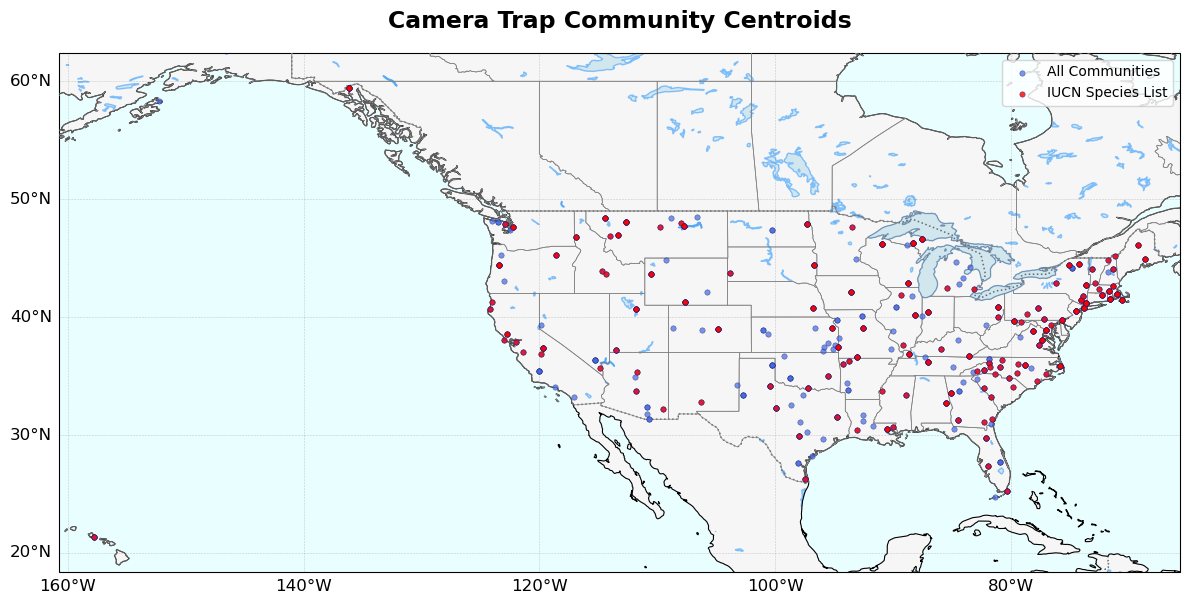

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df_plot = species_list_50km.copy()
min_lon = df_plot['Longitude'].min()
max_lon = df_plot['Longitude'].max()
min_lat = df_plot['Latitude'].min()
max_lat = df_plot['Latitude'].max()

offset = 3
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon - offset, max_lon + offset, min_lat - offset, max_lat + offset], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

# Plot all
ax.scatter(
    df_plot['Longitude'], df_plot['Latitude'],
    c='royalblue', s=15, alpha=0.7,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10,
    label='All Communities'
)

# Plot IUCN
ax.scatter(
    species_with_iucn['Longitude'], species_with_iucn['Latitude'],
    c='red', s=15, alpha=0.8,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10,
    label='IUCN Species List'
)
plt.title(
    'Camera Trap Community Centroids',
    fontsize=17, fontweight='bold', pad=18
)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [80]:
species_with_iucn_2023_greywolf = species_with_iucn[
    (species_with_iucn['Year'] == 2023) &
    (species_with_iucn['Species_List'].apply(lambda x: any('grey wolf' in s.lower() for s in x)))
]
species_with_iucn_2023_greywolf

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry,IUCN_Species_List
46,13,2023,"[elk, white-tailed deer, coyote, american blac...",46.990239,-113.299778,POLYGON ((-112.64254443333579 47.0015573715515...,[Canis lupus]
144,47,2023,"[domestic dog, american black bear, white-tail...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,[Canis lupus]
169,55,2023,"[brown bear, domestic dog, american black bear...",59.413873,-136.116876,POLYGON ((-135.23599264084083 59.4184360942605...,"[Canis lupus, Phocoena phocoena]"
271,99,2023,"[american black bear, white-tailed deer, elk, ...",46.177998,-90.893570,POLYGON ((-90.24642839027196 46.16423347063818...,[Canis lupus]
288,111,2023,"[domestic dog, moose, american black bear, str...",43.647470,-110.488424,POLYGON ((-109.8685277766844 43.64301497546755...,[Canis lupus]
348,137,2023,"[white-tailed deer, coyote, american marten, n...",46.636725,-87.535121,POLYGON ((-86.88185936540621 46.63791529696862...,[Canis lupus]


In [99]:
species_2023_greywolf = species_list_50km[
    (species_list_50km['Year'] == 2023) &
    (species_list_50km['Species_List'].apply(lambda x: any('grey wolf' in s.lower() for s in x)))
]
species_2023_greywolf

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry,IUCN_Species_List
46,13,2023,"[elk, white-tailed deer, coyote, american blac...",46.990239,-113.299778,POLYGON ((-112.64254443333579 47.0015573715515...,[Canis lupus]
144,47,2023,"[domestic dog, american black bear, white-tail...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,[Canis lupus]
169,55,2023,"[brown bear, domestic dog, american black bear...",59.413873,-136.116876,POLYGON ((-135.23599264084083 59.4184360942605...,"[Canis lupus, Phocoena phocoena]"
271,99,2023,"[american black bear, white-tailed deer, elk, ...",46.177998,-90.893570,POLYGON ((-90.24642839027196 46.16423347063818...,[Canis lupus]
288,111,2023,"[domestic dog, moose, american black bear, str...",43.647470,-110.488424,POLYGON ((-109.8685277766844 43.64301497546755...,[Canis lupus]
348,137,2023,"[white-tailed deer, coyote, american marten, n...",46.636725,-87.535121,POLYGON ((-86.88185936540621 46.63791529696862...,[Canis lupus]


In [100]:
species_greywolf = species_list_50km[
    (species_list_50km['Species_List'].apply(lambda x: any('grey wolf' in s.lower() for s in x)))
]
species_greywolf

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry,IUCN_Species_List
44,13,2019,"[white-tailed deer, american black bear, mule ...",46.990239,-113.299778,POLYGON ((-112.64254443333579 47.0015573715515...,"[Sorex preblei, Lepus americanus]"
46,13,2023,"[elk, white-tailed deer, coyote, american blac...",46.990239,-113.299778,POLYGON ((-112.64254443333579 47.0015573715515...,[Canis lupus]
137,44,2021,"[american black bear, coyote, elk, grey wolf, ...",45.289349,-118.561915,POLYGON ((-117.92441492912096 45.2962888875576...,[Myotis lucifugus]
140,47,2019,"[white-tailed deer, american black bear, domes...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,"[Lepus americanus, Sylvilagus floridanus]"
141,47,2020,"[american black bear, white-tailed deer, red f...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,None
142,47,2021,"[american black bear, domestic dog, grey wolf,...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,[Myotis lucifugus]
143,47,2022,"[american black bear, coyote, snowshoe hare, w...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,None
144,47,2023,"[domestic dog, american black bear, white-tail...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,[Canis lupus]
159,53,2019,"[puma, snowshoe hare, bobcat, white-tailed jac...",48.094399,-112.684615,POLYGON ((-112.01324191702226 48.1022807550473...,"[Sorex preblei, Lepus americanus, Sylvilagus a..."
164,54,2019,"[mule deer, american black bear, red squirrel,...",43.640901,-114.329844,POLYGON ((-113.71085114891157 43.6247527925474...,"[Sorex preblei, Lepus americanus, Urocitellus ..."


In [83]:
species_with_canis_lupus = species_with_iucn[
    species_with_iucn['IUCN_Species_List'].apply(
        lambda x: any('canis lupus' in s.lower() for s in x) if isinstance(x, list) else False
    )
]
species_with_canis_lupus

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry,IUCN_Species_List
46,13,2023,"[elk, white-tailed deer, coyote, american blac...",46.990239,-113.299778,POLYGON ((-112.64254443333579 47.0015573715515...,[Canis lupus]
144,47,2023,"[domestic dog, american black bear, white-tail...",46.236770,-88.263815,POLYGON ((-87.61537345302183 46.24209926028310...,[Canis lupus]
155,51,2023,"[white-tailed deer, american black bear, strip...",46.810443,-116.918889,POLYGON ((-116.26356063542572 46.8081026198115...,[Canis lupus]
163,53,2023,"[american black bear, mountain cottontail, whi...",48.094399,-112.684615,POLYGON ((-112.01324191702226 48.1022807550473...,[Canis lupus]
169,55,2023,"[brown bear, domestic dog, american black bear...",59.413873,-136.116876,POLYGON ((-135.23599264084083 59.4184360942605...,"[Canis lupus, Phocoena phocoena]"
271,99,2023,"[american black bear, white-tailed deer, elk, ...",46.177998,-90.893570,POLYGON ((-90.24642839027196 46.16423347063818...,[Canis lupus]
288,111,2023,"[domestic dog, moose, american black bear, str...",43.647470,-110.488424,POLYGON ((-109.8685277766844 43.64301497546755...,[Canis lupus]
316,123,2023,"[domestic dog, white-tailed deer, coyote, elk,...",48.408917,-114.461861,POLYGON ((-113.78718530541562 48.3920415041222...,[Canis lupus]
348,137,2023,"[white-tailed deer, coyote, american marten, n...",46.636725,-87.535121,POLYGON ((-86.88185936540621 46.63791529696862...,[Canis lupus]


In [95]:
# Find common clusters between species_with_canis_lupus and species_with_iucn_2023_greywolf
common_clusters = set(species_with_canis_lupus['Cluster_Agglo']) & set(species_with_iucn_2023_greywolf['Cluster_Agglo'])

# Non-common clusters in species_with_canis_lupus
non_common_clusters_canis_lupus = set(species_with_canis_lupus['Cluster_Agglo']) - common_clusters

# Non-common clusters in species_with_iucn_2023_greywolf
non_common_clusters_greywolf = set(species_with_iucn_2023_greywolf['Cluster_Agglo']) - common_clusters

print("Common clusters:", common_clusters)
print("Non-common clusters:", non_common_clusters_canis_lupus)

Common clusters: {99, 137, 13, 47, 111, 55}
Non-common clusters: {123, 51, 53}


In [104]:
species_list_50km[
    (species_list_50km['Cluster_Agglo'].isin(non_common_clusters_canis_lupus)) &
    (species_list_50km['Year'] != 2023)
]

,Cluster_Agglo,Year,Species_List,Latitude,Longitude,geometry,IUCN_Species_List
153,51,2021,"[eastern gray squirrel, least chipmunk, mule d...",46.810443,-116.918889,POLYGON ((-116.26356063542572 46.8081026198115...,[Myotis lucifugus]
154,51,2022,"[american black bear, coyote, white-tailed dee...",46.810443,-116.918889,POLYGON ((-116.26356063542572 46.8081026198115...,None
159,53,2019,"[puma, snowshoe hare, bobcat, white-tailed jac...",48.094399,-112.684615,POLYGON ((-112.01324191702226 48.1022807550473...,"[Sorex preblei, Lepus americanus, Sylvilagus a..."
160,53,2020,"[white-tailed deer, northern raccoon, mountain...",48.094399,-112.684615,POLYGON ((-112.01324191702226 48.1022807550473...,None
161,53,2021,"[american badger, coyote, mule deer, snowshoe ...",48.094399,-112.684615,POLYGON ((-112.01324191702226 48.1022807550473...,[Myotis lucifugus]
162,53,2022,"[american badger, bobcat, domestic cattle, elk...",48.094399,-112.684615,POLYGON ((-112.01324191702226 48.1022807550473...,None
313,123,2020,"[red squirrel, white-tailed deer, coyote, puma...",48.408917,-114.461861,POLYGON ((-113.78718530541562 48.3920415041222...,None
314,123,2021,"[american beaver, american mink, coyote, muskr...",48.408917,-114.461861,POLYGON ((-113.78718530541562 48.3920415041222...,[Myotis lucifugus]
315,123,2022,"[american beaver, american mink, elk, muskrat,...",48.408917,-114.461861,POLYGON ((-113.78718530541562 48.3920415041222...,None


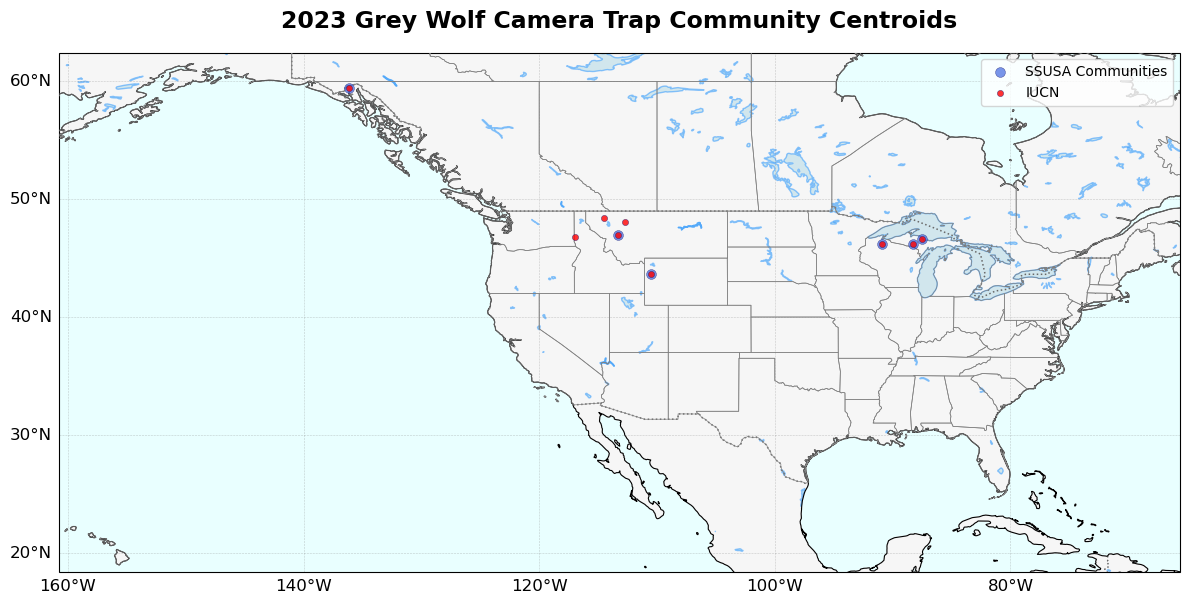

In [93]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df_plot = species_with_iucn_2023_greywolf.copy()
min_lon = df['Longitude'].min()
max_lon = df['Longitude'].max()
min_lat = df['Latitude'].min()
max_lat = df['Latitude'].max()

offset = 3
fig = plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([min_lon - offset, max_lon + offset, min_lat - offset, max_lat + offset], crs=ccrs.PlateCarree())

land = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m', edgecolor='face', facecolor='whitesmoke', alpha=0.9)
ocean = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m', edgecolor='none', facecolor='lightcyan', alpha=0.7)
lakes = cfeature.NaturalEarthFeature(
    'physical', 'lakes', '50m', edgecolor='dodgerblue', facecolor='lightblue', alpha=0.5)

ax.add_feature(ocean, zorder=0)
ax.add_feature(land, zorder=1)
ax.add_feature(lakes, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='dimgray', linewidth=1.1, zorder=3)
ax.add_feature(cfeature.COASTLINE, edgecolor='k', linewidth=0.8, zorder=3)
ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='-', linewidth=0.5, zorder=3)

gl = ax.gridlines(
    draw_labels=True, linewidth=0.4, color='gray', alpha=0.4, linestyle='--'
)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'fontsize': 12}
gl.ylabel_style = {'fontsize': 12}

# Plot df
ax.scatter(
    df_plot['Longitude'], df_plot['Latitude'],
    c='royalblue', s=50, alpha=0.7,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10,
    label='SSUSA Communities'
)

# Plot IUCN
ax.scatter(
    species_with_canis_lupus['Longitude'], species_with_canis_lupus['Latitude'],
    c='red', s=20, alpha=0.8,
    transform=ccrs.PlateCarree(),
    edgecolor='midnightblue', linewidth=0.35, zorder=10,
    label='IUCN'
)
plt.title(
    '2023 Grey Wolf Camera Trap Community Centroids',
    fontsize=17, fontweight='bold', pad=18
)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
# 2. Define your sample bounding box (region)
offset = 2
min_lon, max_lon = -157.74962, -68.61159314
min_lat, max_lat = 21.355811, 59.452635

region_box = box(min_lon, min_lat, max_lon, max_lat)

# 3. Filter points within the region
gdf_in_region = gdf[gdf.geometry.within(region_box)]


In [29]:
from shapely.geometry import Point

# Example coordinates
lat, lon = 34.05, -118.25  # Los Angeles, CA

# Note: GeoPandas and Shapely expect (x, y) = (lon, lat)
point = Point(lon, lat)
multipoly = gdf_1.geometry.iloc[100]
inside = multipoly.contains(point)
print("Is the point inside the polygon?", inside)
print("Point coordinates:", point)
print("Polygon coordinates:", multipoly)

Is the point inside the polygon? False
Point coordinates: POINT (-118.25 34.05)
Polygon coordinates: POLYGON ((107.80870000000004 -2.5354644069999495, 107.81370000000004 -2.537264407999942, 107.82180000000005 -2.5358644069999627, 107.82530000000008 -2.5378644069999723, 107.82610000000005 -2.5401644069999634, 107.82350000000008 -2.5445644079999283, 107.82120000000003 -2.547364406999975, 107.82260000000008 -2.550964406999981, 107.82090000000005 -2.55806440799995, 107.82310000000007 -2.5599644069999385, 107.83510000000007 -2.560764406999965, 107.85580000000004 -2.5621644069999547, 107.86400000000003 -2.5657644069999606, 107.87370000000004 -2.5756644069999766, 107.88820000000004 -2.5756644069999766, 107.89280000000008 -2.578764407999927, 107.89620000000008 -2.5831644069999697, 107.90270000000004 -2.5774644069999795, 107.91370000000006 -2.575964406999958, 107.91440000000006 -2.571564407999972, 107.91660000000007 -2.5699644079999757, 107.91920000000005 -2.5681644069999265, 107.92290000000008

In [30]:
from shapely.geometry import Point

# Your point (make sure (lon, lat) order!)
point = Point(-118.25, 34.05)

# Get a Boolean Series: True where the point is inside the polygon
mask = gdf_1.geometry.contains(point)

# Get all matching rows (could be more than one, especially for multipolygons)
matches = gdf_1[mask]

print(matches)


           id_no                  sci_name  presence  origin  seasonal  \
391        41688              Ursus arctos         5       1         1   
768        14150       Myotis californicus         1       1         1   
1398   123984355         Natalus mexicanus         1       1         1   
1472        8247            Eumops perotis         1       1         1   
2487       16672    Peromyscus maniculatus         1       1         1   
2560       17598   Corynorhinus townsendii         1       1         1   
2676       16654   Peromyscus californicus         1       1         1   
2758        1790        Antrozous pallidus         1       1         1   
3204       20481  Otospermophilus beecheyi         1       1         1   
3353       16636  Perognathus longimembris         1       1         1   
3496        6684          Dipodomys agilis         1       1         1   
3577       41587           Vulpes macrotis         1       1         1   
3856        7928          Eptesicus fu

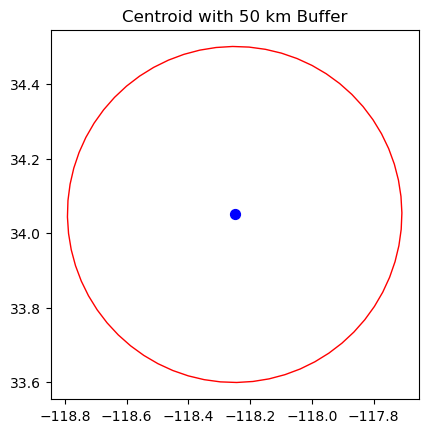

In [31]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt



# 2. Example centroid coordinates
lat, lon = 34.05, -118.25  # Los Angeles, CA

# 3. Create a GeoDataFrame for the centroid
gdf_centroid = gpd.GeoDataFrame(
    {'id': [1]},
    geometry=[Point(lon, lat)],
    crs="EPSG:4326"
)

# 4. Get the appropriate UTM zone for the centroid
utm_epsg = latlon_to_utm_zone(lat, lon)
utm_crs = f"EPSG:{utm_epsg}"

# 5. Project the centroid to the UTM CRS
gdf_centroid_utm = gdf_centroid.to_crs(utm_crs)

# 6. Calculate a 50 km (50,000 meter) buffer
gdf_centroid_utm['geometry'] = gdf_centroid_utm.geometry.buffer(50000)

# 7. Project the buffer back to WGS84 for mapping or export
gdf_buffer_wgs84 = gdf_centroid_utm.to_crs("EPSG:4326")

# 8. Plot the buffer and centroid
ax = gdf_buffer_wgs84.plot(facecolor='none', edgecolor='red')
gdf_centroid.plot(ax=ax, color='blue', markersize=50)
plt.title("Centroid with 50 km Buffer")
plt.show()


In [32]:
buffer_poly = gdf_buffer_wgs84.geometry.iloc[0]
# Get a Boolean Series: True where the point is inside the polygon
mask = gdf.geometry.contains(buffer_poly)
overlap_mask = gdf.geometry.intersects(buffer_poly)

# Get all matching rows (could be more than one, especially for multipolygons)
matches = gdf[overlap_mask]



In [33]:
matches.head()

,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,source,island,tax_comm,dist_comm,generalisd,legend,kingdom,phylum,class,order_,family,genus,category,marine,terrestria,freshwater,SHAPE_Leng,SHAPE_Area,geometry
47,8097,Eschrichtius robustus,1,1,1,IUCN,2012,IUCN (International Union for Conservation of ...,None,None,None,None,None,None,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,ARTIODACTYLA,ESCHRICHTIIDAE,Eschrichtius,LC,true,false,false,1356.879870,275.063627,"MULTIPOLYGON (((-123.06077 38.31144, -123.0549..."
391,41688,Ursus arctos,5,1,1,"D Huber B McLellan, M Proctor",2008,IUCN SSC Bear Specialist Group,None,None,"D Huber B McLellan, M Proctor",None,None,None,0,Extinct,ANIMALIA,CHORDATA,MAMMALIA,CARNIVORA,URSIDAE,Ursus,LC,false,true,false,1145.040546,904.785729,"MULTIPOLYGON (((17.61542 68.14405, 17.852 68.1..."
418,15421,Orcinus orca,1,1,1,IUCN,2013,IUCN (International Union for Conservation of ...,None,None,None,None,None,None,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,ARTIODACTYLA,DELPHINIDAE,Orcinus,DD,true,false,false,13533.136739,38144.587986,"MULTIPOLYGON (((126.57228 7.72344, 126.57228 7..."
768,14150,Myotis californicus,1,1,1,IUCN,2017,NatureServe 2015,None,None,"Patterson, B.D., G. Ceballos, W. Sechrest, M.F...",None,None,None,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,CHIROPTERA,VESPERTILIONIDAE,Myotis,LC,false,true,false,333.176374,404.447561,"MULTIPOLYGON (((-90.23298 15.11836, -90.23382 ..."
957,2475,Balaenoptera borealis,1,1,1,IUCN,2012,IUCN (International Union for Conservation of ...,None,None,None,None,None,None,0,Extant (resident),ANIMALIA,CHORDATA,MAMMALIA,ARTIODACTYLA,BALAENOPTERIDAE,Balaenoptera,EN,true,false,false,8759.735027,32108.879947,"MULTIPOLYGON (((8.99065 -0.7002, 8.99525 -0.69..."
